In [2]:
#@title 


%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="background-color:white; width:25%; height:150px; display: flex;">

<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/GSS_semana_geofisica.png" height="40%">

</div>
<div style="background-color:white; width:50%; height:150px; text-align:center;">

<br><br>

<span style="color:purple; font-size: 16pt;">Minicurso Python para Geofísicos <br></span>
<span style="color:purple; font-size: 25pt;font-weight: bold;"> Janela Móvel - Anexo </span>

</div>

<div style="background-color:white; width:25%; height:150px; text-align:right">
<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/logo_colorida_icone.png" height="60%">
</div>
</div>

<div style="background-color:white">
<center> <span style="color:purple; font-size: 25pt;font-weight: bold;center">Equipe:</span>
<br><br>

<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/vizeu.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fvizeus@gmail.com</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Mário Martins</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Mota</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_dutra.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style="background-color:white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_bijani.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
propriedade = [7,2,8,5,4,1,2] # 7 elementos

# a - janela movel 3

a0 = 7 # pois não existe elemento ANTERIOR a 7

a1 = (7 + 2 + 8)/3
a2 = (2 + 8 + 5)/3
a3 = (8 + 5 + 4)/3
a4 = (5 + 4 + 1)/3
a5 = (4 + 1 + 2)/3

a6 = 2 # pois não existe elemento POSTERIOR a 2

propriedade_suavizada_3 = [a0,a1,a2,a3,a4,a5,a6]

print("propriedade",propriedade)
print("propriedade_suavizada_3",propriedade_suavizada_3)

propriedade [7, 2, 8, 5, 4, 1, 2]
propriedade_suavizada_3 [7, 5.666666666666667, 5.0, 5.666666666666667, 3.3333333333333335, 2.3333333333333335, 2]


In [ ]:
# b - janela movel 5

b0 = 7
b1 = 2

b2 = sum([7,2,8,5,4])/5
b3 = sum([2,8,5,4,1])/5
b4 = sum([8,5,4,1,2])/5

b5 = 1
b6 = 2

propriedade_suavizada_5 = [b0,b1,b2,b3,b4,b5,b6]

print("propriedade",propriedade)
print("propriedade_suavizada_5",propriedade_suavizada_5)

propriedade [7, 2, 8, 5, 4, 1, 2]
propriedade_suavizada_5 [7, 2, 5.2, 4.0, 4.0, 1, 2]


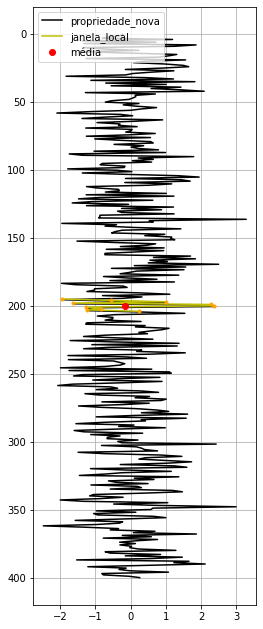

In [ ]:
np.random.seed(90)

profundidade = np.linspace(0,400,400) # cria um array que varia de 100 a 300 com 400 elementos
propriedade_nova = np.random.normal(0.0,1.0,400) # cria um array ALEATÓRIO com distribuição normal com média "0" a variância "1"

# ============================== #
janela_movel = 10
ponto_central_profundidade = 200 # !!!ATENÇÃO!!! não existem elementos 400, nem -1 em "profundidade"
# ============================== #

meia_janela = round(janela_movel/2) # Se o valor da janela for 10, então a meia janela é 5 e o programa pega os 5 elementos acima e abaixo do ponto (aproximado)

# ---------------------------------------------------------------------------- #
# Janela local

janela_local = []
profundidade_local = []
for i in range(ponto_central_profundidade-meia_janela,ponto_central_profundidade+meia_janela):
    profundidade_local.append(i)
    janela_local.append(propriedade_nova[i])

# ---------------------------------------------------------------------------- #
# figura

fig, (ax1) = plt.subplots(1,1)
fig.set_size_inches(4, 11) # tamanho da figura | polegadas

ax1.plot(propriedade_nova,profundidade,'k',label="propriedade_nova")
ax1.plot(janela_local,profundidade_local,'-',color="y",label="janela_local")
ax1.plot(janela_local,profundidade_local,'.',color="orange")
ax1.plot(sum(janela_local)/janela_movel,ponto_central_profundidade,'or',label="média")
ax1.invert_yaxis()
ax1.grid()
ax1.legend(loc=2)
plt.show()

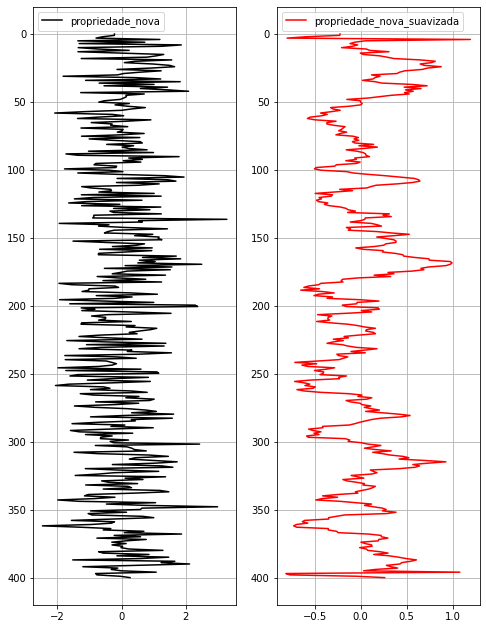

In [ ]:
# janela total

# ============================== #
janela_movel = 10
# ============================== #

n = len(profundidade)

meia_janela = round(janela_movel/2)

propriedade_nova_suavizada = list(propriedade_nova)
for j in range(meia_janela,n - meia_janela): # se a janela for de 10, então o loop tem que ser de 10 a (n-10)

    # >>> Mesmo Bloco acima com algumas modificações
    # ---------------------------------------------------------------------------- #
    # Janela local

    janela_local = []
    profundidade_local = []
    #for i in range(ponto_central_profundidade-janela_movel,ponto_central_profundidade+janela_movel): # mudou para o debaixo
    for i in range(j-meia_janela,j+meia_janela):
        #profundidade_local.append(i) # não utilizado
        janela_local.append(propriedade_nova[i])

    # ---------------------------------------------------------------------------- #
    # >>>
    propriedade_nova_suavizada[j] = sum(janela_local)/len(janela_local)


# ---------------------------------------------------------------------------- #
# Figura

fig, (ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(8, 11) # tamanho da figura | polegadas

ax1.plot(propriedade_nova,profundidade,'k',label="propriedade_nova")
ax1.invert_yaxis()
ax1.grid()
ax1.legend(loc=2)

ax2.plot(propriedade_nova_suavizada,profundidade,'r',label="propriedade_nova_suavizada")
ax2.invert_yaxis()
ax2.grid()
ax2.legend(loc=2)
plt.show()

### Atividade Única: No programa abaixo, qual a diferença entre "propriedade_nova_suavizada" e "propriedade_nova_suavizada_2" ?


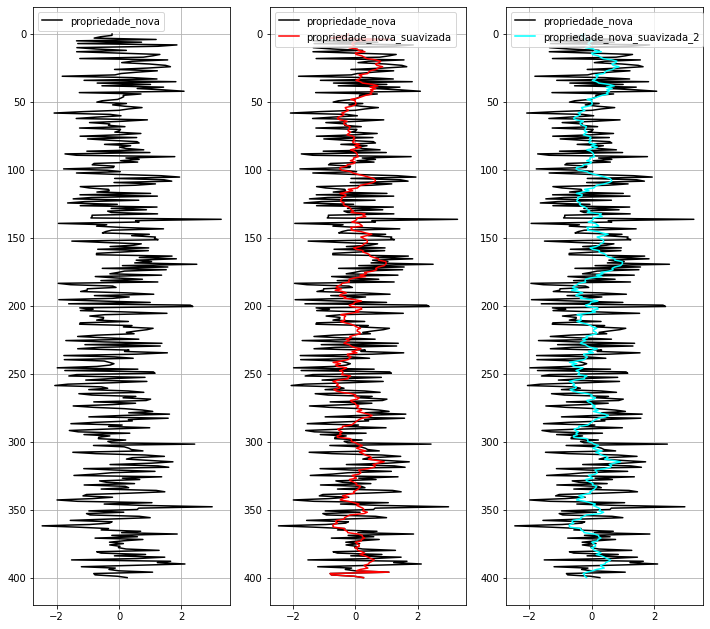

In [ ]:
# Exercício: 

def media_movel(curva,intervalo=100):
    d = list(curva)
    n = len(curva)

    intervalo = round(intervalo/2.0)

    JM = np.zeros(n)
    for j in range(n):
        md = []
        for i in range(j-intervalo,j+intervalo):
            if i < 0:
                i = j-i
            if i >= n-1:
                i = j-i
            md.append(d[i])
        JM[j] = np.mean(md)
    return JM

propriedade_nova_suavizada_2 = log_jm(propriedade_nova,janela_movel)


# Figura

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.set_size_inches(12, 11) # tamanho da figura | polegadas

ax1.plot(propriedade_nova,profundidade,'k',label="propriedade_nova")
ax1.invert_yaxis()
ax1.grid()
ax1.legend(loc=2)

ax2.plot(propriedade_nova,profundidade,'k',label="propriedade_nova")
ax2.plot(propriedade_nova_suavizada,profundidade,'r',label="propriedade_nova_suavizada")
ax2.invert_yaxis()
ax2.grid()
ax2.legend(loc=2)

ax3.plot(propriedade_nova,profundidade,'k',label="propriedade_nova")
ax3.plot(propriedade_nova_suavizada_2,profundidade,'cyan',label="propriedade_nova_suavizada_2")
ax3.invert_yaxis()
ax3.grid()
ax3.legend(loc=2)
plt.show()